In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats

In [3]:
xls = pd.ExcelFile('pain_data_main.xlsx')
everyone_df = pd.read_excel(xls, 'Surgical Registry EVERYONE')
everyone_df.set_index('PatientID', inplace = True)

In [9]:
everyone_df

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,Hrs73_84TMorphEquiv,Hrs85_96TMorphEquiv,Hrs97_108TMorphEquiv,Hrs109_120TMorphEquiv,Hrs121_132TMorphEquiv,Hrs133_144TMorphEquiv,Hrs145_156TMorphEquiv,Hrs157_168TMorphEquiv,Hrs169_180TMorphEquiv,Hrs181_195TMorphEquiv
PatientID,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,...,3.867600,4.484367,2.017467,1.950767,1.817367,1.483867,0.833333,0.833333,1.041667,1.041667
502,1,1,1,179,57.0,1,1,3.86,999.0,999,...,3.959000,2.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,...,1.666667,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,1,1,2,137,63.0,1,2,999.00,777.0,11,...,3.468400,3.684967,0.416667,0.833333,0.416667,0.416667,NaN,NaN,NaN,NaN
505,1,1,1,180,66.0,1,1,3.10,999.0,999,...,4.168500,9.503667,1.458333,1.250000,NaN,NaN,NaN,NaN,NaN,NaN
507,1,1,1,167,55.0,1,1,5.90,999.0,999,...,3.783667,1.666667,5.300000,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
508,1,1,1,234,57.7,1,2,999.00,5.0,10,...,0.416667,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1,1,2,158,40.0,1,2,999.00,777.0,11,...,0.416667,0.416667,0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,1,1,2,177,58.0,1,2,999.00,4.0,11,...,1.625000,0.625000,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop selected patients.
everyone_df.drop([513,515,544,547],0, inplace = True)

everyone_df.drop(columns = 'Avg72hourMax', inplace = True)

In [5]:
# Split into two dataframes.
# Haller for chest surgeries and Risser for spine surgeries
chest_df = everyone_df[everyone_df['Haller Index (999= not applicable)'] != 999]
spine_df = everyone_df[everyone_df['Risser'] != 999]
print(spine_df.shape,chest_df.shape)

(42, 114) (24, 114)


In [6]:
# Impute missing value for patient 534
spine_df.at[534,'Risser'] = 777
spine_df.at[534, 'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'] = stats.median(spine_df['Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'])
spine_df.at[534, 'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'] = stats.median(spine_df['Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'])
spine_df.at[534, '# of levels'] = stats.median(spine_df['# of levels'])
spine_df.at[534, 'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)'] = stats.median(spine_df['Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)'])
spine_df.at[534, 'Top degree '] = stats.median(spine_df['Top degree '])
spine_df.at[534, 'Bottom degree'] = stats.median(spine_df['Bottom degree'])

In [13]:
spine_df.loc[[534]]

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,Hrs73_84TMorphEquiv,Hrs85_96TMorphEquiv,Hrs97_108TMorphEquiv,Hrs109_120TMorphEquiv,Hrs121_132TMorphEquiv,Hrs133_144TMorphEquiv,Hrs145_156TMorphEquiv,Hrs157_168TMorphEquiv,Hrs169_180TMorphEquiv,Hrs181_195TMorphEquiv
PatientID,,,,,,,,,,,,,,,,,,,,,
534,2,1,1,275,50.4,1,2,999.0,777.0,11,...,0.741933,7.086667,0.833333,0.208333,0.833333,0.208333,NaN,NaN,NaN,NaN


# Trends Shown

* Surgical Location Trends
* Timeline of discharge dates and discharge numbers
* On average how many days in there

In [25]:
# Surgical Location Trends



PatientID
504    2014-03-27 00:00:00
508    2014-05-23 00:00:00
509    2014-06-28 00:00:00
510    2014-07-08 00:00:00
511    2014-02-05 00:00:00
512    2014-06-07 00:00:00
514    2014-06-14 00:00:00
516    2014-07-19 00:00:00
517    2014-07-05 00:00:00
519    2014-07-06 00:00:00
Name: DischargeDate, dtype: object

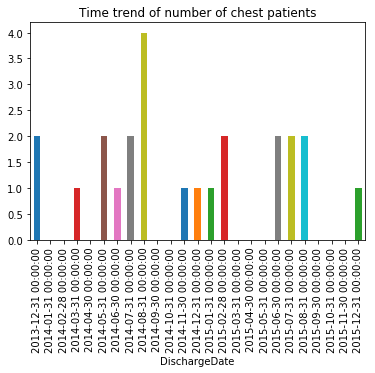

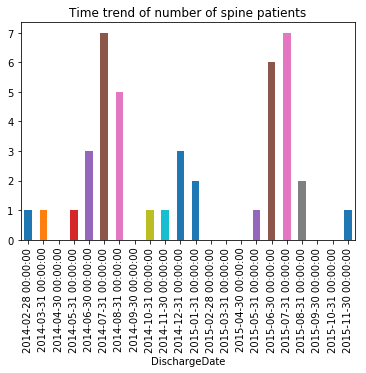

In [14]:
# Timeline of discharge dates and discharge numbers

chest_df1 = chest_df.reset_index()
chest_df1.set_index('DischargeDate', inplace = True)
chest_df1 = chest_df1.groupby(pd.Grouper(freq = 'M')).count()
chest_df1.reset_index(inplace = True)
chest_df1.plot(x = 'DischargeDate', y = 'PatientID', kind = 'bar', legend = False, title = 'Time trend of number of chest patients')


spine_df1 = spine_df.reset_index()
spine_df1.set_index('DischargeDate', inplace = True)
spine_df1 = spine_df1.groupby(pd.Grouper(freq = 'M')).count()
spine_df1.reset_index(inplace = True)
spine_df1.plot(x = 'DischargeDate', y = 'PatientID', kind = 'bar', legend = False, title = 'Time trend of number of spine patients')

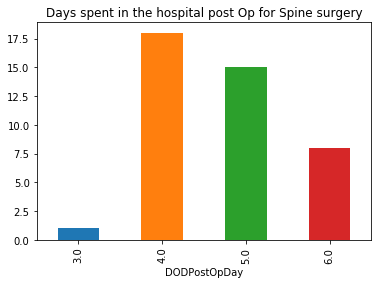

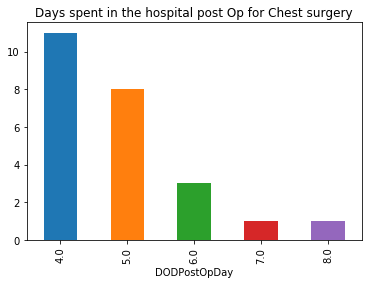

In [15]:
# On average how many days inpatient
spine_df2 = spine_df.reset_index()
spine_df2 = spine_df2.groupby('DODPostOpDay',as_index = False).count()
spine_df2.plot(x = 'DODPostOpDay', y = 'PatientID', kind = 'bar', legend = False, title = 'Days spent in the hospital post Op for Spine surgery')

chest_df2 = chest_df.reset_index()
chest_df2 = chest_df2.groupby('DODPostOpDay',as_index = False).count()
chest_df2.plot(x = 'DODPostOpDay', y = 'PatientID', kind = 'bar', legend = False, title = 'Days spent in the hospital post Op for Chest surgery')

# Surgery History vs. Pain Level

In [12]:
surgeryhist = everyone_df[["SurgeryHX","Surgeries","Hrs0_12MeanPainScore","Hrs13_24MeanPainScore","Hrs25_36MeanPainScore",\
            "Hrs37_48MeanPainScore","Hrs49_60MeanPainScore","Hrs61_72MeanPainScore"]]
#Split the patients into two groups: patients with surgery history/ patients without surgery history
had_surgery = surgeryhist[surgeryhist["SurgeryHX"]==1]
no_surgery = surgeryhist[surgeryhist["SurgeryHX"]==0]
#Average mean pain score over the first 72 hours
avg_pain_had = had_surgery.mean()
avg_pain_no = no_surgery[no_surgery["Hrs13_24MeanPainScore"]!=999].mean()
df_mean = pd.DataFrame({
    "hr_after_operation": ["0-12","13-24","25-36","37-48","49-60","61-72"],
    "has surgery history": list(avg_pain_had[1:]),
    "no surgery history": list(avg_pain_no[2:])})
df_mean

,hr_after_operation,has surgery history,no surgery history
0,0-12,3.737059,3.924583
1,13-24,3.041176,3.875957
2,25-36,2.994706,3.841458
3,37-48,3.171765,3.489583
4,49-60,3.534706,3.981111
5,61-72,3.810588,4.082340


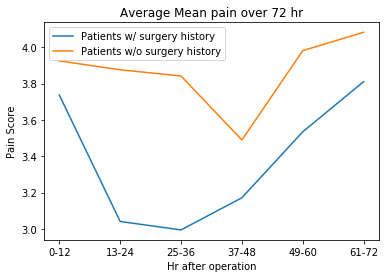

In [11]:
ax = df_mean.plot(title="Average Mean pain over 72 hr")
plt.legend(['Patients w/ surgery history', 'Patients w/o surgery history'])
plt.xlabel('Hr after operation')
plt.ylabel('Pain Score')
ax.set_xticks(df_mean.index)
ax.set_xticklabels(df_mean.hr_after_operation)
plt.show()

In [13]:
#Get the Average max pain score over 72 hours
surgeryhist = everyone_df[["SurgeryHX","Surgeries","Hrs0_12MaxPainScore","Hrs13_24MaxPainScore","Hrs25_36MaxPainScore",\
            "Hrs37_48MaxPainScore","Hrs49_60MaxPainScore","Hrs61_72MaxPainScore"]]
#Split the patients into two groups: patients with surgery history/ patients without surgery history
had_surgery = surgeryhist[surgeryhist["SurgeryHX"]==1]
no_surgery = surgeryhist[surgeryhist["SurgeryHX"]==0]
#Average mean pain score over the first 72 hours
avg_maxpain_had = had_surgery.mean()
avg_maxpain_no = no_surgery[no_surgery["Hrs13_24MaxPainScore"]!=999].mean()
df_max = pd.DataFrame({
    "hr_after_operation": ["0-12","13-24","25-36","37-48","49-60","61-72"],
    "has surgery history": list(avg_maxpain_had[1:]),
    "no surgery history": list(avg_maxpain_no[2:])})
df_max

,hr_after_operation,has surgery history,no surgery history
0,0-12,4.823529,5.614583
1,13-24,4.588235,5.117021
2,25-36,4.088235,5.006250
3,37-48,4.235294,4.687500
4,49-60,4.705882,4.958333
5,61-72,4.705882,5.425532


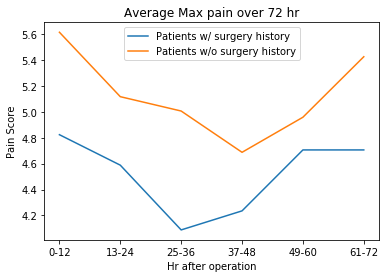

In [14]:
ax = df_max.plot(title="Average Max pain over 72 hr")
plt.legend(['Patients w/ surgery history', 'Patients w/o surgery history'])
plt.xlabel('Hr after operation')
plt.ylabel('Pain Score')
ax.set_xticks(df_max.index)
ax.set_xticklabels(df_max.hr_after_operation)
plt.show()

In [15]:
print(len(had_surgery.index))
print(len(no_surgery.index))

17
49


There are 17 patients with surgery history and 49 patients without surgery history. After calculating the average mean pain score and max pain score every 12hrs over 72hrs after the operation for each group, the results turns out that the patients had surgery before reported lower level of pain after the operation than those ones without surgery history.